In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
import time
from PIL import Image
from tqdm.notebook import tqdm

In [0]:
%cd images

/content/drive/My Drive/images


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
//Code starts here

In [0]:

import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.models import mobilenet_v2
from skimage import io

In [0]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

class CarPlate(Dataset):
    def __init__(self, df):
        self.df = df
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img = self.df['image_name'].iloc[idx]
        x_img = io.imread(f"/content/drive/My Drive/images/data/{img}")
        #print(x_img)
        x_img = cv2.cvtColor(x_img, cv2.COLOR_BGR2RGB)
        x_img = Image.fromarray(x_img)
        x_img = transform(x_img)
        x1 = self.df["top_x"].iloc[idx]
        y1 = self.df["top_y"].iloc[idx]
        x2 = self.df["bottom_x"].iloc[idx]
        y2 = self.df["bottom_y"].iloc[idx]
        y_img = torch.FloatTensor([x1, y1, x2, y2])
        return x_img, y_img
        

In [0]:
df = pd.read_csv("indian_license_plates.csv")
df = df.sample(len(df))

In [0]:
train = df[:200]
val = df[200:]

In [0]:
trainset = CarPlate(train)
valset = CarPlate(val)

In [0]:
loaders = {
    'train': DataLoader(trainset, batch_size=32),
    'val': DataLoader(valset, batch_size=8)
}

In [0]:
model = mobilenet_v2(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/checkpoints/mobilenet_v2-b0353104.pth


In [0]:
model.classifier = nn.Sequential(
    nn.Linear(in_features=1280, out_features=128),
    nn.Dropout(0.5),
    nn.ReLU(),
    nn.Linear(in_features=128, out_features=64),
    nn.ReLU(),
    nn.Linear(in_features=64, out_features=4),
    nn.Sigmoid()
)

In [0]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-5)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
def train_model(model, criterion, optimizer, num_epochs=25):
    model.to(device)
    best_acc = 0.0
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print("-" * 10)
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            running_loss = 0.0
            running_corrects = 0
            t_samples = 0
            for inputs, labels in tqdm(loaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                t_samples += labels.shape[0]
                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                
            epoch_loss = running_loss / t_samples

            print("{} Loss: {}".format(phase, round(epoch_loss, 3)))
    return model

In [0]:
model = train_model(model, criterion, optimizer, 50)

Epoch 0/49
----------



train Loss: 0.018



val Loss: 0.019
Epoch 1/49
----------



train Loss: 0.017



val Loss: 0.019
Epoch 2/49
----------



train Loss: 0.018



val Loss: 0.019
Epoch 3/49
----------



train Loss: 0.018



val Loss: 0.019
Epoch 4/49
----------



train Loss: 0.017



val Loss: 0.018
Epoch 5/49
----------



train Loss: 0.018



val Loss: 0.018
Epoch 6/49
----------



train Loss: 0.017



val Loss: 0.018
Epoch 7/49
----------



train Loss: 0.017



val Loss: 0.018
Epoch 8/49
----------



train Loss: 0.017



val Loss: 0.018
Epoch 9/49
----------



train Loss: 0.017



val Loss: 0.018
Epoch 10/49
----------



train Loss: 0.016



val Loss: 0.018
Epoch 11/49
----------



train Loss: 0.017



val Loss: 0.018
Epoch 12/49
----------



train Loss: 0.016



val Loss: 0.018
Epoch 13/49
----------



train Loss: 0.015



val Loss: 0.018
Epoch 14/49
----------



train Loss: 0.016



val Loss: 0.017
Epoch 15/49
----------



train Loss: 0.016



val Loss: 0.017
Epoch 16/49
----------



train Loss: 0.015



val Loss: 0.017
Epoch 17/49
----------



train Loss: 0.015



val Loss: 0.017
Epoch 18/49
----------



train Loss: 0.016



val Loss: 0.017
Epoch 19/49
----------



train Loss: 0.016



val Loss: 0.017
Epoch 20/49
----------



train Loss: 0.015



val Loss: 0.017
Epoch 21/49
----------



train Loss: 0.015



val Loss: 0.017
Epoch 22/49
----------



train Loss: 0.015



val Loss: 0.017
Epoch 23/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 24/49
----------



train Loss: 0.015



val Loss: 0.017
Epoch 25/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 26/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 27/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 28/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 29/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 30/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 31/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 32/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 33/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 34/49
----------



train Loss: 0.014



val Loss: 0.017
Epoch 35/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 36/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 37/49
----------



train Loss: 0.012



val Loss: 0.017
Epoch 38/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 39/49
----------



train Loss: 0.012



val Loss: 0.017
Epoch 40/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 41/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 42/49
----------



train Loss: 0.012



val Loss: 0.017
Epoch 43/49
----------



train Loss: 0.013



val Loss: 0.017
Epoch 44/49
----------



train Loss: 0.012



val Loss: 0.016
Epoch 45/49
----------



train Loss: 0.012



val Loss: 0.016
Epoch 46/49
----------



train Loss: 0.012



val Loss: 0.016
Epoch 47/49
----------



train Loss: 0.012



val Loss: 0.016
Epoch 48/49
----------



train Loss: 0.012



val Loss: 0.016
Epoch 49/49
----------



train Loss: 0.011



val Loss: 0.016


In [0]:
import os
def infer_img(path, model):
    # Check if File exists
    if not os.path.isfile(path):
        return np.zeros((224, 224, 3))

    img = cv2.imread(path)
    assert(isinstance(img,np.ndarray)), ("Invalid Image")
    h, w, c = img.shape
    
    x_img = transform(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))
    x_img = x_img.unsqueeze(0).to('cuda')
    y_pred = model(x_img)
    x1_pred, y1_pred, x3_pred, y3_pred = y_pred.cpu().detach().numpy()[0].tolist()
    im = cv2.rectangle(img, (int(w * x1_pred), int(h * y1_pred)), (int(w * x3_pred), int(h * y3_pred)), (0, 0, 255), 3)
    
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [0]:
im = infer_img('licensed_car1.jpeg', model)

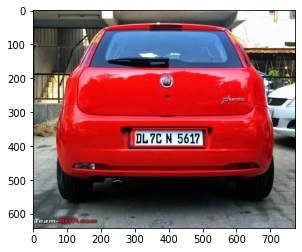

In [0]:
plt.imshow(im)